In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns 

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



## Load data

* using skipinitialspace to remove extra space
* using na_value to see ? as NA

In [248]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
# df  = pd.read_csv("../input/adult-census-income/adult.csv", skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

## Data cleaning

This section is to removed records with missing values.

In [6]:
#filter data to remove records with missing value, for the convenience, make a deep copy and use dropna 
# cleaned_df = df.copy('true').dropna(axis=0)

In [7]:
# cleaned_df['over_50K'] = np.where(cleaned_df.income == '<=50K', 0, 1)
# cleaned_df['sex_num'] = np.where(cleaned_df.sex == 'Female', 0, 1)

# cleaned_df['workclass_num'] = cleaned_df.workclass.map({'Self-emp-not-inc' : 0, 'Private':1, 'State-gov':2, 
#                                                           'Without-pay':3, 'Local-gov':4, 'Self-emp-inc':5, 'Federal-gov':6, 'Never-worked':7}).astype(int)


# cleaned_df['marital_status_num'] = cleaned_df['marital_status'].map({'Never-married' : 0, 'Widowed' : 1, 'Separated' : 2, 
#                                                                        'Married-spouse-absent' : 3, 'Married-civ-spouse' : 4, 'Divorced' : 5, 'Married-AF-spouse' : 6}).astype(int)

# cleaned_df['occupation_num'] = cleaned_df['occupation'].map({'Farming-fishing' : 0, 'Other-service' : 1, 'Transport-moving' : 2, 'Protective-serv' : 3, 'Exec-managerial' : 4, 'Armed-Forces' : 5, 
#  'Machine-op-inspct' : 6, 'Prof-specialty' : 7, 'Tech-support' : 8, 'Handlers-cleaners' : 9, 'Priv-house-serv' : 10, 'Adm-clerical' : 11, 'Craft-repair' : 12, 'Sales' : 13}).astype(int)

# cleaned_df['relationship_num'] = cleaned_df['relationship'].map({'Wife' : 0, 'Unmarried' : 1, 'Own-child' : 2, 'Husband' : 3, 'Other-relative' : 4, 'Not-in-family' : 5}).astype(int)
# cleaned_df['race_num'] = cleaned_df['race'].map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})

# cleaned_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])



,age,education_num,capital_gain,capital_loss,hours_per_week,over_50K,sex_num,workclass_num,marital_status_num,occupation_num,relationship_num,race_num
0,50,13,0,0,13,0,1,0,4,4,3,0
1,38,9,0,0,40,0,1,1,5,9,5,0
2,53,7,0,0,40,0,1,1,4,9,3,1
3,28,13,0,0,40,0,0,1,4,7,0,1
4,37,14,0,0,40,0,0,1,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,0,0,38,0,0,1,4,8,0,0
32556,40,9,0,0,40,1,1,1,4,6,3,0
32557,58,9,0,0,40,0,0,1,1,11,1,0
32558,22,9,0,0,20,0,1,1,0,11,2,0


In [244]:
from sklearn.model_selection import GridSearchCV

C_range = [0.1, 1, 10, 100]
gamma_vals = [0.001, 0.0001, 'scale']
param_grid = dict(gamma=gamma_vals, C=C_range)

grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=10)
grid.fit(X, y.values.ravel())

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

KeyboardInterrupt: 

## Support Vector Machine


### Split data and pick features 

In [258]:
# df.dropna(axis=0)
# df.income = df.income.apply(lambda x: 0 if x=='<=50K' else 1)
# df = df.sample(frac=1, random_state=10)
# holdout = df[:3000]
# df = df[:-3000]
# print(len(df))
# print(len(holdout))

29560
3000


In [296]:
from sklearn.model_selection import train_test_split

# Pick discussed features
# X = cleaned_df[['education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'sex_num', 'workclass_num', 'marital_status_num', 'occupation_num', 'relationship_num', 'race_num']]
X = df.drop(['income'], axis=1)

# Pick the labels (Income)
# y = cleaned_df['over_50K']
y = df['income']

# Spliting into 80% for training set and 20% for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

20692
20692
8868
8868


### Use SVM
Based on tutorial from page https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

And: https://www.kaggle.com/joshuaisanan/income-classification-grbf-kernel-svm-eda

### Use LinearSVC

In [288]:
DUMMIES_COLS = ['race', 'workclass', 'marital_status', 'occupation']
DROP_COLS = ['fnlwgt', 'sex', 'native_country', 'relationship', 'education']

X_train2 = X_train.copy()
X_train2 = pd.get_dummies(X_train2, columns=DUMMIES_COLS)
X_train2.columns
# df2

Index(['age', 'fnlwgt', 'education', 'education_num', 'relationship', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital_status_Divorced', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
   

In [289]:
# find best features

from sklearn.feature_selection import SelectPercentile, chi2

X_train2 = X_train2.drop(DROP_COLS, axis=1)
y_train2 = y_train

test = SelectPercentile(score_func=chi2, percentile=16)

fit = test.fit(X_train2, y_train2)

X_train2.columns[test.get_support()]



Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married'],
      dtype='object')

In [290]:

SELECTED_COLS = X_train2.columns[test.get_support()]

from sklearn.preprocessing import StandardScaler

X_train2 = X_train2[SELECTED_COLS]
# X
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_train2

array([[ 0.39159121, -0.42262178, -0.14542963, ..., -1.66313901,
        -0.92464664, -0.69672601],
       [ 0.02550649, -1.59271542,  0.2093582 , ..., -0.03889659,
         1.08149422, -0.69672601],
       [-0.26736129,  0.35744065, -0.14542963, ..., -0.03889659,
         1.08149422, -0.69672601],
       ...,
       [-0.63344601, -0.42262178, -0.14542963, ..., -0.03889659,
         1.08149422, -0.69672601],
       [ 0.61124204, -0.42262178, -0.14542963, ..., -0.03889659,
         1.08149422, -0.69672601],
       [-0.7798799 ,  1.9175655 , -0.14542963, ...,  3.61564886,
        -0.92464664,  1.43528443]])

In [291]:
from sklearn.svm import SVC, LinearSVC

model = LinearSVC(max_iter = 10000, dual=False)
model.fit(X_train2, y_train2.values.ravel())

LinearSVC(dual=False, max_iter=10000)

In [297]:
# holdout['new_educ_num'] = holdout.apply(lambda x: x['education.num']-8 if x['education.num'] >= 9 else 0, axis=1)

X_test = pd.get_dummies(X_test, columns=DUMMIES_COLS)

# X_test = holdout2[SELECTED_COLS]
# y_test = holdout2[['income']]
X_test = X_test[SELECTED_COLS]

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
# test_y
print('Accuracy on test set: {:.5f}'.format(model.score(X_test, y_test)))
# y_test
# holdout2

Accuracy on test set: 0.84021


In [298]:
#Confusion Matrix
#The result is telling us that we have 2089+416 correct predictions and 335+177 incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6265  465]
 [ 952 1186]]


In [299]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Income more than 50K', 'Income less than 50K']))

                      precision    recall  f1-score   support

Income more than 50K       0.87      0.93      0.90      6730
Income less than 50K       0.72      0.55      0.63      2138

            accuracy                           0.84      8868
           macro avg       0.79      0.74      0.76      8868
        weighted avg       0.83      0.84      0.83      8868



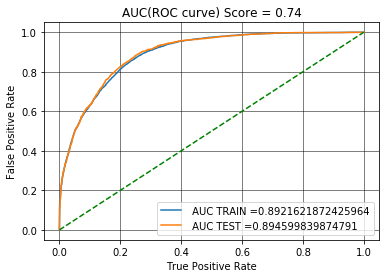

In [313]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_train_pred = model.decision_function(X_train2)    
y_test_pred = model.decision_function(X_test)

roc_auc = roc_auc_score(y_test, model.predict(X_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train2, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve) Score = %0.2f" % roc_auc)
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Use kernelized SVM 

 using grid search to find the optimal hyperparameters.

In [317]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

notFoundBestGridParams = 1;
best_params = {}

# if notFoundBestGridParams == 9:
#     C_range = [0.1, 1, 10, 100]
#     gamma_vals = [0.001, 0.0001, 'scale']
#     param_grid = dict(gamma=gamma_vals, C=C_range)

#     grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=10)
#     grid.fit(X, Y.values.ravel())
    
#     best_params = grid.best_params_;
#     print("The best parameters are %s" % (grid.best_params_, grid.best_score_))

# we found that C = 100 and grammar = 'scale' is the best

svmModel = SVC(kernel='rbf', C = 10, gamma = 'scale')
svmModel.fit(X_train2, y_train2)

print(classification_report(y_test, svmModel.predict(X_test), target_names=['Income more than 50K', 'Income less than 50K']))

                      precision    recall  f1-score   support

Income more than 50K       0.87      0.95      0.91      6730
Income less than 50K       0.77      0.55      0.64      2138

            accuracy                           0.85      8868
           macro avg       0.82      0.75      0.77      8868
        weighted avg       0.85      0.85      0.84      8868



In [318]:
print('Accuracy on test set: {:.5f}'.format(svmModel.score(X_test, y_test)))

Accuracy on test set: 0.85239


### Learning curve

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Learning curve')

Text(0.5, 0, 'Training data')

Text(0, 0.5, 'Score')

Learning curve for this SVM model


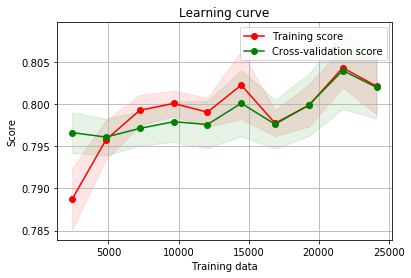

In [7]:
# Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

train_size=np.linspace(0.1, 1, 10)

plt.figure()
plt.title("Learning curve")
plt.xlabel("Training data")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(svmModel, X, Y, train_sizes=train_size)
train_scores_mean = np.mean(train_scores, axis=1)

train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)
plt.grid()
    
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
plt.legend(loc="best")

print('Learning curve for this SVM model')

## Validation curve

In [18]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.1, 1, 10)
param_name="C"
ylim=[0.78, 0.90]
    
train_scores, test_scores = validation_curve(svmModel, X, Y, param_name="C", param_range=param_range, scoring="accuracy")

In [ ]:
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(param_range,train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', label='Test Accuracy')
plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')

plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
